Maximal difference (without outer 100 bins):  4.860716056764858e-06
[6000.       6000.010001 6000.020002 ... 6099.979998 6099.989999
 6100.      ]
[6000.40027691 6000.41027858 6000.42028025 ... 6100.38694486 6100.39694653
 6100.4069482 ]
[1.05000008 1.05000008 1.05000017 ... 1.         1.         1.        ]


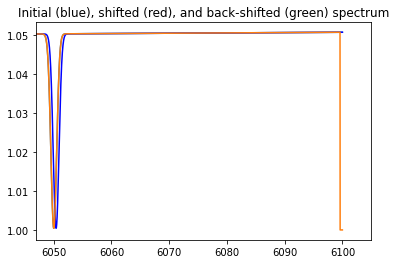

In [13]:
from __future__ import print_function, division
from PyAstronomy import pyasl
import matplotlib.pylab as plt
import numpy as np

# Create a "spectrum" with 0.01 A binning ...
wvl = np.linspace(6000., 6100., 10000)
# ... a gradient in the continuum ...
flux = np.ones(len(wvl)) + (wvl/wvl.min())*0.05
# ... and a Gaussian absoption line
flux -= np.exp(-(wvl-6050.)**2/(2.*0.5**2))*0.05

# Shift that spectrum redward by 20 km/s using
# "firstlast" as edge handling method.
nflux1, wlprime1 = pyasl.dopplerShift(wvl, flux, 20., edgeHandling="firstlast")

# Shift the red-shifted spectrum blueward by 20 km/s, i.e.,
# back on the initial spectrum.
nflux2, wlprime = pyasl.dopplerShift(wvl, nflux1, -20.,
                                     edgeHandling="fillValue", fillValue=1.0)

# Check the maximum difference in the central part
indi = np.arange(len(flux)-200) + 100
print("Maximal difference (without outer 100 bins): ",
      max(np.abs(flux[indi]-nflux2[indi])))

# Plot the outcome
plt.title("Initial (blue), shifted (red), and back-shifted (green) spectrum")
plt.plot(wvl, flux)
plt.plot(wvl, nflux1, 'b')
print(wvl)
print(wlprime1)
plt.xlim(6047)
plt.plot(wvl, nflux2)
print(nflux2)
plt.show()